# PH1978L Final Group Project
Authors: Chiu-Feng Yap, Allison Shay, Joy Yoo

Given a dataset of demographic, lifestyle, social and school related attributes of students, **predict student performance (G3)- (final grade; numeric from 0 to 20)**.

**Three scenarios of predictions will be considered:**
* 1- Classification with two levels (pass/fail)
* 2- Classification with five levels (from I - excellent to V - insufficient)
* 3- Regression, with a numeric output that ranges between 0 and 20

Should include comparison between different machine-learning models (one of which must be linear, and at least 2 non-linear models).

Consider different scenarios where we exclude G1 and G2 variables from our models.

In [2]:
# import libraries we will be using:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import loadtxt
import seaborn as sns
from scipy.stats import chi2_contingency, boxcox
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings 
warnings.filterwarnings(action= 'ignore')

In [4]:
# read in the data
# df = pd.read_csv("./Data/school_grades_dataset.csv")
df = pd.read_csv("/Users/joy4031/OneDrive - The University of Texas Health Science Center at Houston/F21/1978/school_grades_dataset.csv")

# Scenario 1 -  Classification with two levels (pass/fail);

In [5]:
df1 = df

In [6]:
# create two level categorical variable for classification with two levels (pass/fail)
# create a list of our conditions
conditions = [
    (df['G3'] <= 10),
    (df['G3'] > 10)
    ]

# create a list of the values we want to assign for each condition
values = ['fail', 'pass' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df1['G3_pass_fail'] = np.select(conditions, values)

In [12]:
df1.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,pass
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13,pass
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13,pass
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13,pass
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17,pass
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13,pass


In [8]:
df1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [9]:
df1.dtypes

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
G3_pass_fail    object
dtype: object

In [10]:
X = df1.drop(['G3', 'G3_pass_fail'], axis=1) # exclude independent variables
y = df1['G3_pass_fail']  # only include dependent variable data

In [13]:
df1_dummy = pd.get_dummies(data=df1, drop_first=True)
df1_dummy.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3_pass_fail_pass
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1


In [20]:
X = df1_dummy.drop(['G3', 'G3_pass_fail_pass'], axis=1)
y = df1_dummy['G3_pass_fail_pass']

In [21]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# numerical features
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Standardization
X_train_stand = X_train.copy() # copy of datasets
X_test_stand = X_test.copy()

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

    
# Normalization
X_train_norm = X_train.copy() # copy of datasets
X_test_norm = X_test.copy()

for i in num_cols:
    norm = MinMaxScaler().fit(X_train_norm[[i]])
    X_train_norm[i] = norm.transform(X_train_norm[[i]])
    X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [26]:
X_train.shape

(486, 41)

In [28]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors":[10,20,50,100,200,300]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train) 


#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Test set score: 0.87
Best parameters: {'n_neighbors': 20}
Best cross-validation score: 0.88
Best estimator:
KNeighborsClassifier(n_neighbors=20)


In [30]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(knn.score(X_test, y_test)))

knn.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(knn.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(knn.score(X_test_stand, y_test)))

knn.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(knn.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(knn.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.90
Test set accuracy RAW: 0.87
Test set accuracy Standardized: 0.84
Test set accuracy Standardized: 0.85
Test set accuracy Normalized: 0.76
Test set accuracy Normalized: 0.77


In [24]:
# Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set RAW: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score RAW: {:.3f}".format(logreg.score(X_test, y_test)))

logreg = LogisticRegression().fit(X_train_stand, y_train)
print("Training set Standardized: {:.3f}".format(logreg.score(X_train_stand, y_train)))
print("Test set score Standardized: {:.3f}".format(logreg.score(X_test_stand, y_test)))

logreg = LogisticRegression().fit(X_train_norm, y_train)
print("Training set Normalized: {:.3f}".format(logreg.score(X_train_norm, y_train)))
print("Test set score Normalized: {:.3f}".format(logreg.score(X_test_norm, y_test)))

Training set RAW: 0.936
Test set score RAW: 0.871
Training set Standardized: 0.936
Test set score Standardized: 0.896
Training set Normalized: 0.889
Test set score Normalized: 0.853


In [31]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
param_grid = {"splitter":['best', 'random'], "max_depth":[5,10,15,20], "min_samples_split": [5,10,15,20], "max_features":['auto', 'sqrt', 'log2']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.78
Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation score: 0.88
Best estimator:
DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=10)


In [35]:
tree = DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=10)
tree.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(tree.score(X_test, y_test)))

tree.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(tree.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(tree.score(X_test_stand, y_test)))

tree.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(tree.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(tree.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.92
Test set accuracy RAW: 0.88
Test set accuracy Standardized: 0.88
Test set accuracy Standardized: 0.87
Test set accuracy Normalized: 0.89
Test set accuracy Normalized: 0.85


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'max_features': ['auto', 'sqrt','log2'],
        'min_samples_split': [5,10,15,20],
        'n_estimators': [10, 20, 40, 60, 80, 100]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.91
Best parameters: {'bootstrap': False, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 60}
Best cross-validation score: 0.92
Best estimator:
RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_split=15, n_estimators=60)


In [44]:
rf = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt', min_samples_split=15, n_estimators=60)
rf.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(rf.score(X_test, y_test)))

rf.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(rf.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(rf.score(X_test_stand, y_test)))

rf.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(rf.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(rf.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.97
Test set accuracy RAW: 0.91
Test set accuracy Standardized: 0.97
Test set accuracy Standardized: 0.91
Test set accuracy Normalized: 0.97
Test set accuracy Normalized: 0.91


In [49]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'max_features': ['auto', 'sqrt','log2'],
        'min_samples_split': [50, 80, 100, 150],
        'n_estimators': [10, 20, 50, 100, 200]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.91
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 150, 'n_estimators': 20}
Best cross-validation score: 0.92
Best estimator:
GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20)


In [50]:
gb = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20)
gb.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(gb.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(gb.score(X_test, y_test)))

gb.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(gb.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(gb.score(X_test_stand, y_test)))

gb.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(gb.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(gb.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.97
Test set accuracy RAW: 0.91
Test set accuracy Standardized: 0.98
Test set accuracy Standardized: 0.91
Test set accuracy Normalized: 0.97
Test set accuracy Normalized: 0.91


In [53]:
# SVM
from sklearn.svm import SVC
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'sigmoid','poly'],'degree': [2,3,5,7]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.90
Best parameters: {'C': 100, 'degree': 7, 'gamma': 0.001, 'kernel': 'poly'}
Best cross-validation score: 0.92
Best estimator:
SVC(C=100, degree=7, gamma=0.001, kernel='poly')


In [54]:
# SVM scaled
from sklearn.svm import SVC
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'sigmoid','poly'],'degree': [2,3,5,7]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_stand, y_train)

#score on test set    
print("Test set score: {:.2f}".format(grid_search.score(X_test_stand, y_test)))

#best parameters that were found
print("Best parameters: {}".format(grid_search.best_params_))
#best cross-validation accuracy (the mean accuracy over the different splits for this parameter setting)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
#access the actual model that was found (look at coefficients or feature importances)
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.86
Best parameters: {'C': 1000, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.89
Best estimator:
SVC(C=1000, degree=2, gamma=1, kernel='linear')


In [59]:
svc = SVC(C=100, degree=7, gamma=0.001, kernel='poly')
svc.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(svc.score(X_test, y_test)))

svc.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_test_stand, y_test)))

svc.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_test_norm, y_test)))

print("\n")
svc = SVC(C=1000, degree=2, gamma=1, kernel='linear')
svc.fit(X_train, y_train)
print("Train set accuracy RAW: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy RAW: {:.2f}".format(svc.score(X_test, y_test)))

svc.fit(X_train_stand, y_train)
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_train_stand, y_train)))
print("Test set accuracy Standardized: {:.2f}".format(svc.score(X_test_stand, y_test)))

svc.fit(X_train_norm, y_train)
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_train_norm, y_train)))
print("Test set accuracy Normalized: {:.2f}".format(svc.score(X_test_norm, y_test)))

Train set accuracy RAW: 0.94
Test set accuracy RAW: 0.90
Test set accuracy Standardized: 0.68
Test set accuracy Standardized: 0.74
Test set accuracy Normalized: 0.68
Test set accuracy Normalized: 0.74


Train set accuracy RAW: 0.95
Test set accuracy RAW: 0.86
Test set accuracy Standardized: 0.95
Test set accuracy Standardized: 0.86
Test set accuracy Normalized: 0.95
Test set accuracy Normalized: 0.85


Test score: 0.908


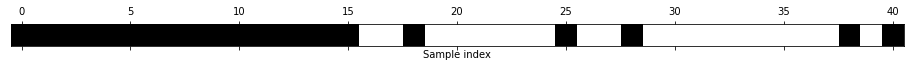

In [70]:
# Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

#transform then apply LogisticRegression
X_test_l1 = select.transform(X_test)
score = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))


In [71]:
# Evaluation method
from sklearn.metrics import classification_report, roc_curve, auc
gb = GradientBoostingClassifier(max_depth=10, max_features='auto',
                           min_samples_split=150, n_estimators=20).fit(X_train, y_train)
print(classification_report(y_test, gb.predict(X_test)))

from sklearn.metrics import roc_auc_score
gb_auc = roc_auc_score(y_test, gb.decision_function(X_test))
print("AUC for GB: {:.3f}".format(gb_auc))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.93      0.94      0.94       121

    accuracy                           0.91       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.91      0.91      0.91       163

AUC for GB: 0.956
Area under ROC curve = 0.96


# Scenario 2 -  Classification with five levels (from I - excellent to V - insufficient)

In [ ]:
df2 = df

In [ ]:
# create five level categorical variable for classification with five levels (from I - excellent to V - insufficient); and
conditions = [
    (df['G3'] <= 4),
    (df['G3'] > 4) & (df['G3'] <=8),
    (df['G3'] > 8) & (df['G3'] <=12),
    (df['G3'] > 12) & (df['G3'] <=16),
    (df['G3'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = ['I', 'II', 'III', 'IV', 'V' ]

# create a new column and use np.select to assign values to it using our lists as arguments
df2['G3_five_level'] = np.select(conditions, values)

In [ ]:
X = df2.drop(['G3', 'G3_five_level'], axis=1) # exclude independent variables
y = df2['G3_five_level']  # only include dependent variable data

# Scenario 3 - Regression, with a numeric output that ranges between 0 and 20.

In [3]:
df3 = df.copy()

In [4]:
df3.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
df3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# let's take a look at missingness
df3_missing = missing_values_table(df3)
df3_missing

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Exploratory Data Analysis

In [8]:
df3.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

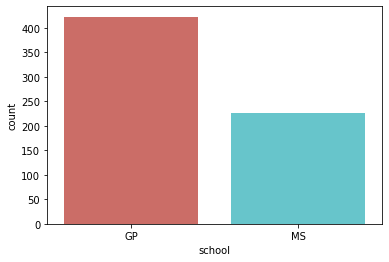

In [9]:
sns.countplot(x='school', data=df3, palette='hls')
plt.show()

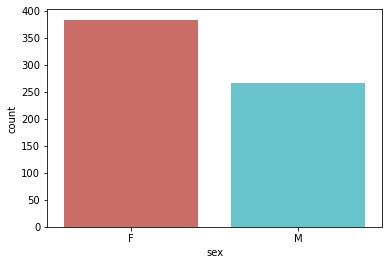

In [10]:
sns.countplot(x='sex', data=df3, palette='hls')
plt.show()

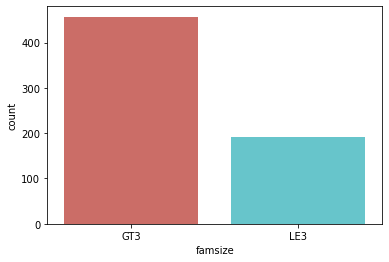

In [12]:
sns.countplot(x='famsize', data=df3, palette='hls')
plt.show()

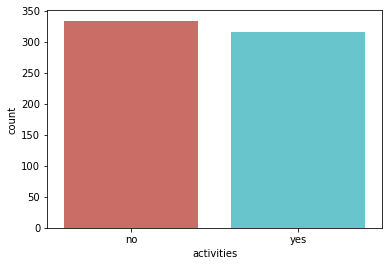

In [14]:
sns.countplot(x='activities', data=df3, palette='hls')
plt.show()

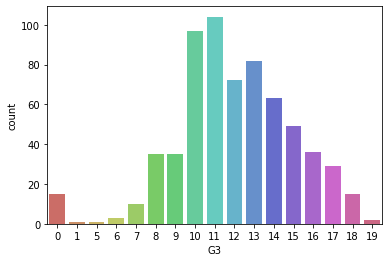

In [7]:
#creating a countplot to show the distribution of G3
sns.countplot(x='G3', data=df3, palette='hls')
plt.show()

### Feature Transformation

A rule of thumb, skewness can be interpreted like this:

* Fairly symmetrical = -0.5 to 0.5
* Moderately skewed= -0.5 to -1.0 and 0.5 to 1.0
* Highly skewed = <-1.0 and >1.0

From the table above, it seems like **traveltime**, **failures**, **famrel**, **Dalc**, and **absences** are highly skewed and **studytime**, **Walc**, and **G3** are moderately skewed. Let's take a look at their histogram

In [15]:
df3.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
age,0.416795,0.071509
Medu,-0.029950,-1.260619
Fedu,0.215343,-1.109241
traveltime,1.247648,1.108865
studytime,0.699619,0.037846
failures,3.092699,9.824409
famrel,-1.105934,1.348973
freetime,-0.181277,-0.396959
goout,-0.008580,-0.865454
Dalc,2.141913,4.349297


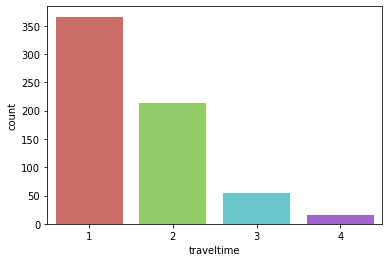

In [23]:
sns.countplot(x='traveltime', data=df3, palette='hls')
plt.show()

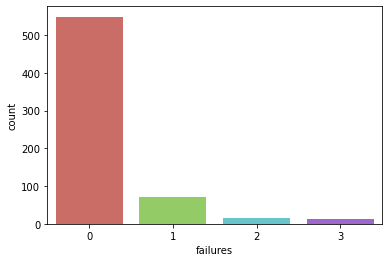

In [24]:
sns.countplot(x='failures', data=df3, palette='hls')
plt.show()

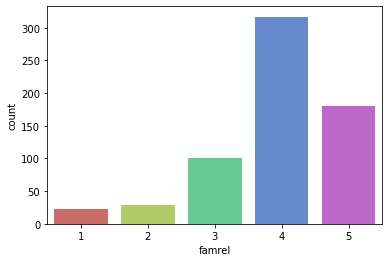

In [25]:
sns.countplot(x='famrel', data=df3, palette='hls')
plt.show()

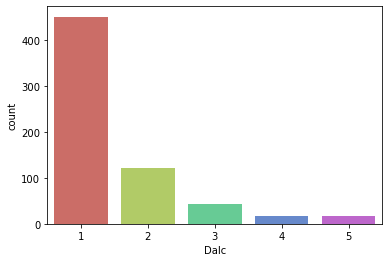

In [26]:
sns.countplot(x='Dalc', data=df3, palette='hls')
plt.show()

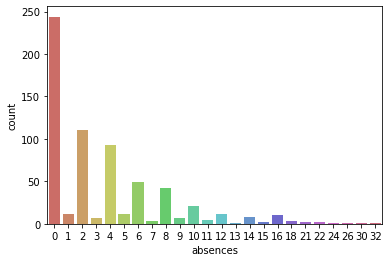

In [27]:
sns.countplot(x='absences', data=df3, palette='hls')
plt.show()

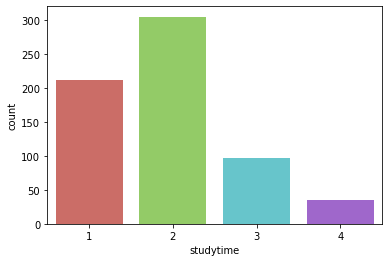

In [28]:
sns.countplot(x='studytime', data=df3, palette='hls')
plt.show()

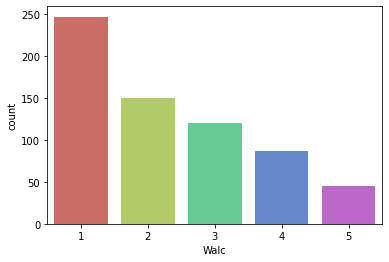

In [29]:
sns.countplot(x='Walc', data=df3, palette='hls')
plt.show()

In [44]:
df3_dummy = pd.get_dummies(data=df3, drop_first=True) # Do not use fit_intercept = False if you have removed 1 column after dummy encoding

In [46]:
X = df3_dummy.drop(['G3'], axis=1) # exclude independent variables and variables that have been transformed
y = df3_dummy['G3']  # only include dependent variable data

In [47]:
df3.select_dtypes("int").columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [53]:
# Raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# numerical features
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
            'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Standardization
X_train_stand = X_train.copy() # copy of datasets
X_test_stand = X_test.copy()

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

    
# Normalization
X_train_norm = X_train.copy() # copy of datasets
X_test_norm = X_test.copy()

for i in num_cols:
    norm = MinMaxScaler().fit(X_train_norm[[i]])
    X_train_norm[i] = norm.transform(X_train_norm[[i]])
    X_test_norm[i] = norm.transform(X_test_norm[[i]])

In [99]:
# Linear Regression
model = LinearRegression()

grid={}
model_cv=GridSearchCV(model,grid,cv=5, scoring='r2')
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))

R2 for Raw: 0.8486513286537314
R2 for Normalized: 0.8486513286537314
R2 for Standardized: 0.8486513286537314


In [96]:
# Ridge
from sklearn.linear_model import Ridge
model = Ridge()

grid={"alpha": [0.01, 0.1, 1,10], "solver":['svd', 'cholesky', 'lsqr', 'sag'], "fit_intercept":[False], "normalize":[True, False]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

model = Ridge(alpha=10, fit_intercept=False, normalize= True, solver='lsqr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))

Best parameters:  {'alpha': 10, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'}
R2 for Raw: 0.8473075356020919
R2 for Normalized: 0.7922321018630787
R2 for Standardized: 0.5642078836088122


In [97]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

grid={"n_neighbors":range(2,10)}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))

Best parameters:  {'n_neighbors': 6}
R2 for Raw: 0.8095448060861522
R2 for Normalized: 0.2357470422778304
R2 for Standardized: 0.7234543255422603


In [104]:
# Lasso
from sklearn.linear_model import Lasso
model = Lasso()

grid={'alpha':[0.01, 0.1, 1.0, 10]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))

Best parameters:  {'alpha': 0.1}
R2 for Raw: 0.8622779978973782
R2 for Normalized: 0.8339421502480268
R2 for Standardized: 0.8662012971537298


In [107]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

grid={"min_samples_split": range(2,10), "splitter":['best', 'random'], "max_depth":range(1,10), "max_features":['auto', 'sqrt', 'log2']}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

model = DecisionTreeRegressor(max_depth=3, max_features='auto', min_samples_split=2, splitter='best')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))

Best parameters:  {'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 9, 'splitter': 'random'}
R2 for Raw: 0.8022585124119805
R2 for Normalized: 0.8022585124119805
R2 for Standardized: 0.8022585124119805


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)

grid={'bootstrap': [True, False],
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))

In [ ]:
# Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)

grid={}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))

In [ ]:
# Support Vector Machine
from sklearn.svm import SVR
model = SVR()

grid={}
model_cv=GridSearchCV(model,grid,cv=5)
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)
print("Best parameters: ", model_cv.best_params_)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 for Raw:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('R2 for Normalized:', metrics.r2_score(y_test, y_pred))

model.fit(X_train_stand, y_train)
y_pred = model.predict(X_test_stand)
print('R2 for Standardized:', metrics.r2_score(y_test, y_pred))